In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings(action='ignore') 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [9]:
# df = pd.read_csv('DLA_2nd_ORIGIN_DLADATA202009_20200130120000.csv') # 남자 비만 시간별
# df = pd.read_csv('DLA_2nd_ORIGIN_DLADATA202011_20200130120000.csv') # 여자 비만 시간별
df = pd.read_csv('시간별남성.csv', encoding = 'cp949') # 정상 남자 시간별
# df = pd.read_csv('시간별여성.csv', encoding = 'cp949') # 정상 여자 시간별

In [10]:
df.head()

,DATE,RANK,FOOD,COUNT,RATE,AGE,TIME
0,2021-10-01,1,시루떡,1,100.0,[0-19],0
1,2021-10-01,2,없음,0,0.0,[0-19],0
2,2021-10-01,3,없음,0,0.0,[0-19],0
3,2021-10-01,4,없음,0,0.0,[0-19],0
4,2021-10-01,5,없음,0,0.0,[0-19],0


In [ ]:
df.columns = ['Date', 'Num', 'Food', 'Count', 'Ratio', 'Age', 'Time']

In [ ]:
df = df[df['Food']!=' 없음']

In [ ]:
# df_F = df.groupby(by = 'Time')['Food'].count().reset_index()
# df_F.columns = ['Time', 'Count']

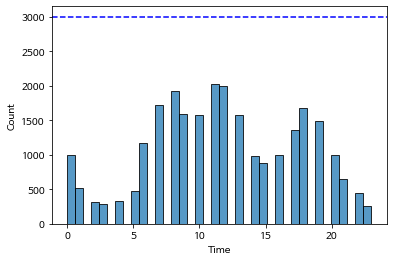

In [ ]:
sns.histplot(data=df, x=df.Time)
plt.axhline(3000, linestyle='--', color ='blue')

In [ ]:
df = df[['Time', 'Food','Count']]

In [ ]:
df

,Time,Food,Count
0,0,호두과자,3
1,0,초코우유,1
2,0,비요뜨쿠키앤크림,1
20,6,고구마(찐것),1
40,7,바나나,3
...,...,...,...
49659,0,곤드레밥,1
49660,1,떡볶이,1
49661,1,토마토소스스파게티,1
49662,1,단무지,1


In [ ]:
df2 = df.groupby(by=['Time','Food'], sort=True)['Count'].sum()

In [ ]:
df2

Time  Food         
0     3분데리야끼치킨         1
      CJ맛밤             1
      가나마일드            1
      가래떡              2
      가지나물             4
                      ..
23    한치초밥             1
      핫바               1
      현미밥(현미50%)       1
      호가든맥주            1
      황성주국산콩검은콩과17곡    1
Name: Count, Length: 12341, dtype: int64

In [ ]:
df2 = df2.reset_index(name = 'count')

In [ ]:
df2

,Time,Food,count
0,0,3분데리야끼치킨,1
1,0,CJ맛밤,1
2,0,가나마일드,1
3,0,가래떡,2
4,0,가지나물,4
...,...,...,...
12336,23,한치초밥,1
12337,23,핫바,1
12338,23,현미밥(현미50%),1
12339,23,호가든맥주,1


In [ ]:
df3 = pd.DataFrame(columns=['Time','Food','count'])

new=df2.iloc[df2.loc[df2['Time']==0]['count'].sort_values(ascending=False)[:10].index]

df3.append(new)


,Time,Food,count
286,0,쌀밥,45
199,0,배추김치,45
236,0,삶은계란,29
30,0,고구마(찐것),26
391,0,채소샐러드,22
196,0,방울토마토,15
232,0,사과,13
483,0,흑미밥,12
52,0,김구이,12
291,0,아메리카노,10


In [ ]:
df2

,Time,Food,count
0,0,3분데리야끼치킨,1
1,0,CJ맛밤,1
2,0,가나마일드,1
3,0,가래떡,2
4,0,가지나물,4
...,...,...,...
12336,23,한치초밥,1
12337,23,핫바,1
12338,23,현미밥(현미50%),1
12339,23,호가든맥주,1


In [ ]:
df2.iloc[df2.loc[df2['Time']==0]['count'].sort_values(ascending=False)[:3].index]

,Time,Food,count
286,0,쌀밥,45
199,0,배추김치,45
236,0,삶은계란,29


In [ ]:
for i in range(len(df2.groupby(by='Time'))):
  df3 = df3.append(df2.iloc[df2.loc[df2['Time']==i]['count'].sort_values(ascending=False)[:3].index], ignore_index=True)

In [ ]:
df3

,Time,Food,count
0,0,쌀밥,45
1,0,배추김치,45
2,0,삶은계란,29
3,1,배추김치,23
4,1,고구마(찐것),13
...,...,...,...
67,22,오이,7
68,22,우유,7
69,23,쌀밥,7
70,23,오이,5


In [ ]:
df4 = df3

In [ ]:
df5 = df4[:18]

In [ ]:
df5

,Time,Food,count
0,0,쌀밥,45
1,0,배추김치,45
2,0,삶은계란,29
3,1,배추김치,23
4,1,고구마(찐것),13
5,1,아메리카노,11
6,2,고구마(찐것),11
7,2,쌀밥,9
8,2,사과,7
9,3,쌀밥,15


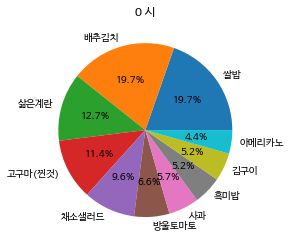

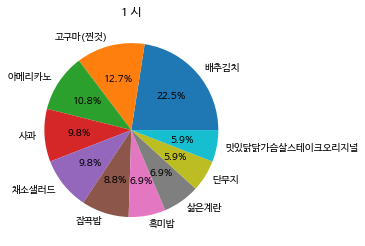

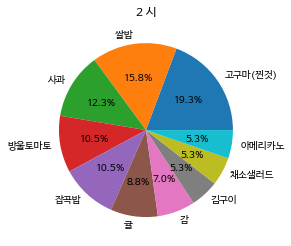

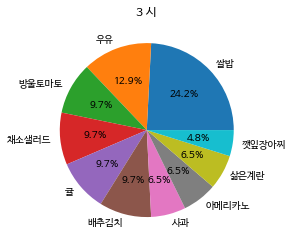

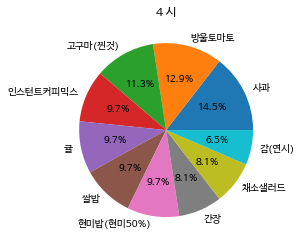

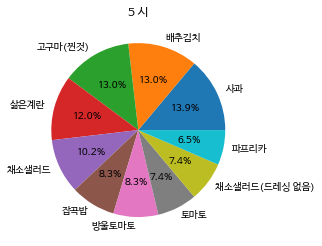

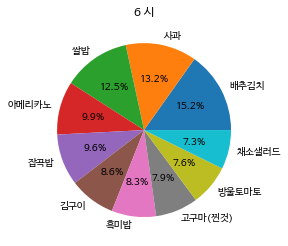

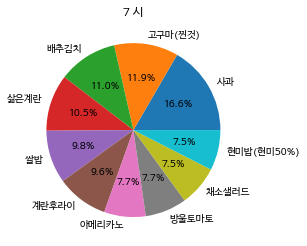

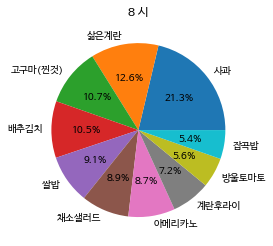

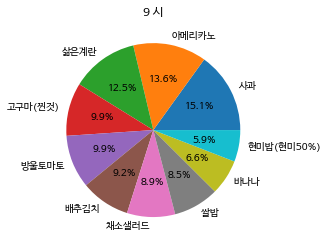

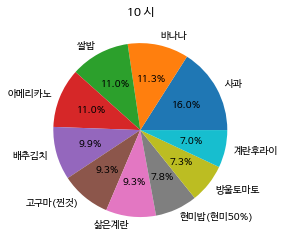

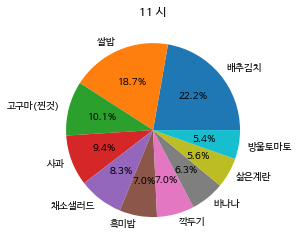

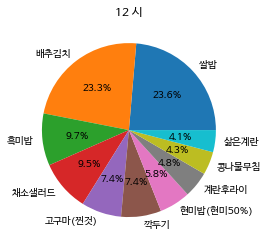

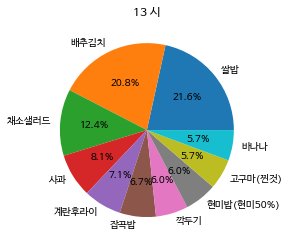

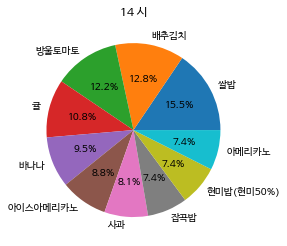

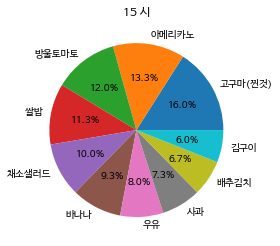

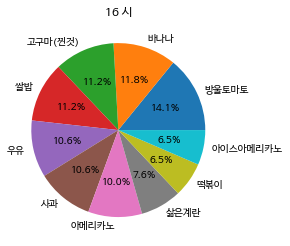

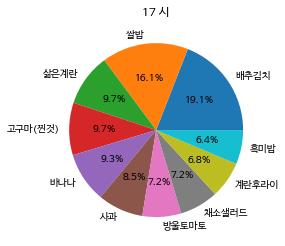

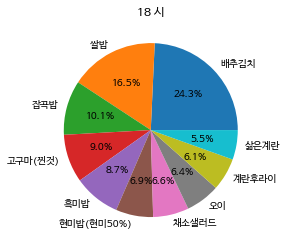

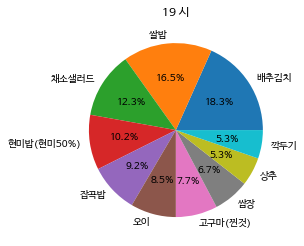

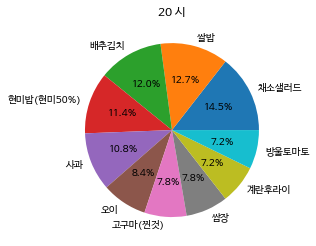

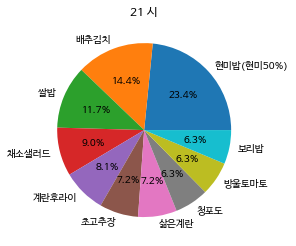

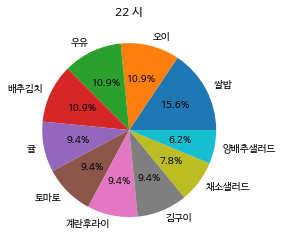

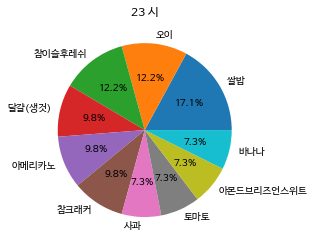

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(df2.groupby(by='Time'))):
  d = pd.DataFrame()
  d = df2.iloc[df2.loc[df2['Time']==i]['count'].sort_values(ascending=False)[:10].index]
  count_list = list(d['count'])
  # print(count_list) # count list
  name_list = list(d['Food'])
  # print(name_list) # name list
  plt.title('%d 시' %i)
  plt.pie(count_list, labels=name_list, autopct = '%.1f%%')
  
  print('')
  plt.show()

In [ ]:
df_time1 = df4[69:]
df_time1 = df_time1.append(df4[:15])

In [ ]:
df_time1

,Time,Food,count
69,23,쌀밥,7
70,23,오이,5
71,23,참이슬후레쉬,5
0,0,쌀밥,45
1,0,배추김치,45
2,0,삶은계란,29
3,1,배추김치,23
4,1,고구마(찐것),13
5,1,아메리카노,11
6,2,고구마(찐것),11


In [ ]:
df_time_test = df_time1

In [ ]:
df_time_test = df_time_test.groupby(by='Food')['count'].sum().reset_index()

In [ ]:
df_time_test = df_time_test.sort_values(by='count', ascending=False)

In [ ]:
df_time_test

,Food,count
5,쌀밥,76
2,배추김치,68
0,고구마(찐것),31
4,삶은계란,29
3,사과,16
1,방울토마토,14
6,아메리카노,11
8,우유,8
7,오이,5
9,참이슬후레쉬,5


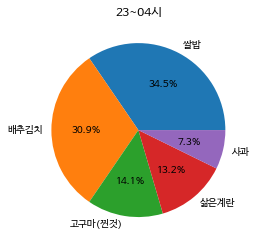

In [ ]:
import matplotlib.pyplot as plt

df_time_test_ = df_time_test[:5]
count_list = list(df_time_test_['count'])
# print(count_list) # count list
name_list = list(df_time_test_['Food'])
# print(name_list) # name list
plt.pie(count_list, labels=name_list, autopct = '%.1f%%')
plt.title('23~04시')

print('')
plt.show()

In [ ]:
df_time2 = df4[15:33]
df_time2

,Time,Food,count
15,5,사과,15
16,5,배추김치,14
17,5,고구마(찐것),14
18,6,배추김치,46
19,6,사과,40
20,6,쌀밥,38
21,7,사과,71
22,7,고구마(찐것),51
23,7,배추김치,47
24,8,사과,103


In [ ]:
df_time_test = df_time2
df_time_test = df_time_test.groupby(by='Food')['count'].sum().reset_index()
df_time_test = df_time_test.sort_values(by='count', ascending=False)

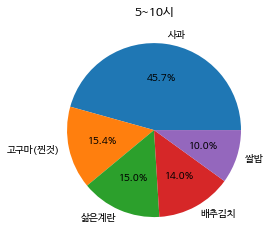

In [ ]:
import matplotlib.pyplot as plt

df_time_test_ = df_time_test[:5]
count_list = list(df_time_test_['count'])
# print(count_list) # count list
name_list = list(df_time_test_['Food'])
# print(name_list) # name list
plt.pie(count_list, labels=name_list, autopct = '%.1f%%')
plt.title('5~10시')

print('')
plt.show()

In [ ]:
df_time3 = df4[33:51]
df_time3

,Time,Food,count
33,11,배추김치,99
34,11,쌀밥,83
35,11,고구마(찐것),45
36,12,쌀밥,127
37,12,배추김치,125
38,12,흑미밥,52
39,13,쌀밥,61
40,13,배추김치,59
41,13,채소샐러드,35
42,14,쌀밥,23


In [ ]:
df_time_test = df_time3
df_time_test = df_time_test.groupby(by='Food')['count'].sum().reset_index()
df_time_test = df_time_test.sort_values(by='count', ascending=False)

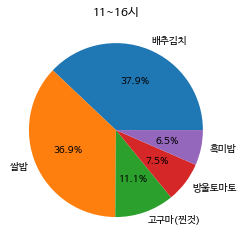

In [ ]:
import matplotlib.pyplot as plt

df_time_test_ = df_time_test[:5]
count_list = list(df_time_test_['count'])
# print(count_list) # count list
name_list = list(df_time_test_['Food'])
# print(name_list) # name list
plt.pie(count_list, labels=name_list, autopct = '%.1f%%')
plt.title('11~16시')

print('')
plt.show()

In [ ]:
df_time4 = df4[51:69]
df_time4

,Time,Food,count
51,17,배추김치,45
52,17,쌀밥,38
53,17,삶은계란,23
54,18,배추김치,84
55,18,쌀밥,57
56,18,잡곡밥,35
57,19,배추김치,52
58,19,쌀밥,47
59,19,채소샐러드,35
60,20,채소샐러드,24


In [ ]:
df_time_test = df_time4
df_time_test = df_time_test.groupby(by='Food')['count'].sum().reset_index()
df_time_test = df_time_test.sort_values(by='count', ascending=False)

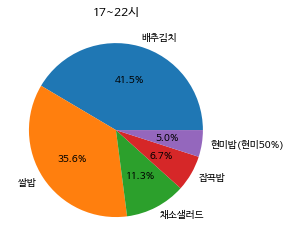

In [ ]:
import matplotlib.pyplot as plt

df_time_test_ = df_time_test[:5]
count_list = list(df_time_test_['count'])
# print(count_list) # count list
name_list = list(df_time_test_['Food'])
# print(name_list) # name list
plt.pie(count_list, labels=name_list, autopct = '%.1f%%')
plt.title('17~22시')

print('')
plt.show()